In [143]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Prepping data set for Logistic Regression, Decision Trees, and Naive Bayes Gaussian and Multinomial models

In [188]:


df = pd.read_csv('FINAL_FINAL.csv')
df = df[['Event number of finishers', 'distance_range', 'age_at_race', 'hours', 'avgtemp', 'Elevation gain']]

df = df[df['distance_range'].isin(['91-120', '71-90'])]


df['distance_range'].value_counts()
df.dropna(inplace= True)
df.isna().value_counts()

#Encoding Label, 0 now corresponds to 50mi race 1 corresponds to 100 km race
y = df['distance_range']
le = LabelEncoder()
y = le.fit_transform(y)

# X is the rest of the DF
X = df.drop('distance_range', axis=1)

#Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 69)
X_train = X_train.astype(float)


In [ ]:
#Exporting Data

df.to_csv("FINAL_mult-log-gaus.csv", index=False)
X_train.to_csv("mult_Xtrain.csv", index=False)
X_test.to_csv("mult_Xtest.csv", index=False)

## Multinomial and Gaussian Naive Bayes 

Accuracy: 0.7252747252747253
              precision    recall  f1-score   support

       71-90       0.71      0.77      0.74       918
      91-120       0.74      0.68      0.71       902

    accuracy                           0.73      1820
   macro avg       0.73      0.72      0.72      1820
weighted avg       0.73      0.73      0.72      1820



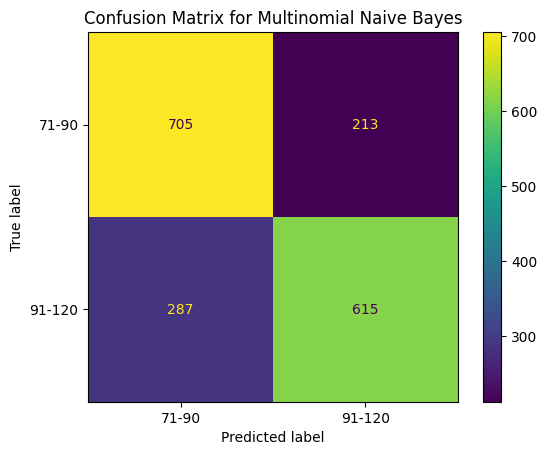

In [125]:
# Multinomial NB

# Training Multinomial NB
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

Accuracy: 0.8730769230769231
              precision    recall  f1-score   support

       71-90       0.87      0.88      0.87       918
      91-120       0.87      0.87      0.87       902

    accuracy                           0.87      1820
   macro avg       0.87      0.87      0.87      1820
weighted avg       0.87      0.87      0.87      1820



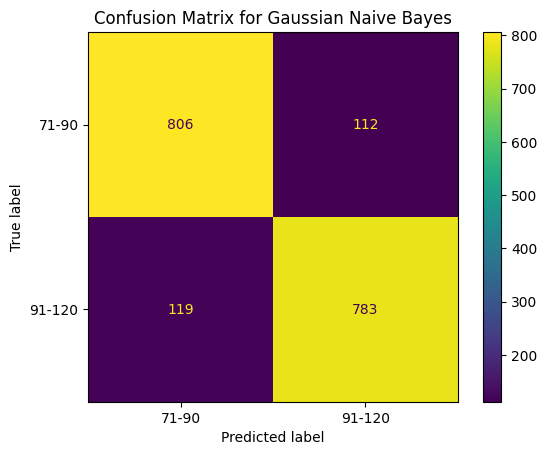

In [126]:
#Gaussian NB

# Training Gaussian NB model
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()

## Logistic Regression

Accuracy: 0.8131868131868132
              precision    recall  f1-score   support

       71-90       0.81      0.83      0.82       918
      91-120       0.82      0.80      0.81       902

    accuracy                           0.81      1820
   macro avg       0.81      0.81      0.81      1820
weighted avg       0.81      0.81      0.81      1820



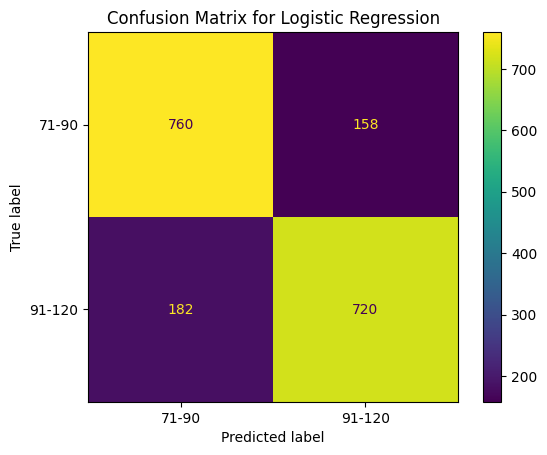

In [127]:
#Logistic Regression on the Same data

logreg = LogisticRegression(max_iter=1000) 

# Fitting logistic reg model
logreg.fit(X_train, y_train)

# Predict test set
y_pred_logreg = logreg.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, display_labels=le.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Decision Trees

Accuracy: 0.9994505494505495
              precision    recall  f1-score   support

       71-90       1.00      1.00      1.00       918
      91-120       1.00      1.00      1.00       902

    accuracy                           1.00      1820
   macro avg       1.00      1.00      1.00      1820
weighted avg       1.00      1.00      1.00      1820



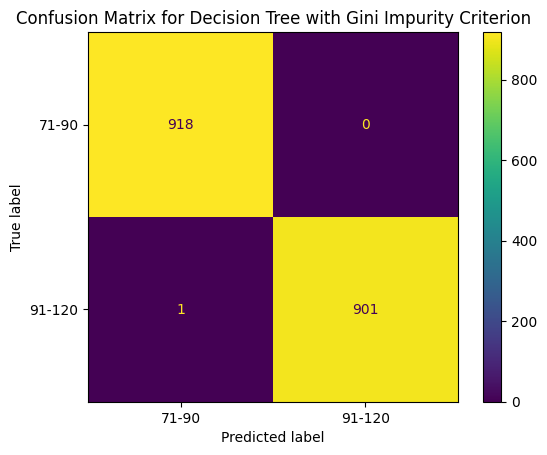

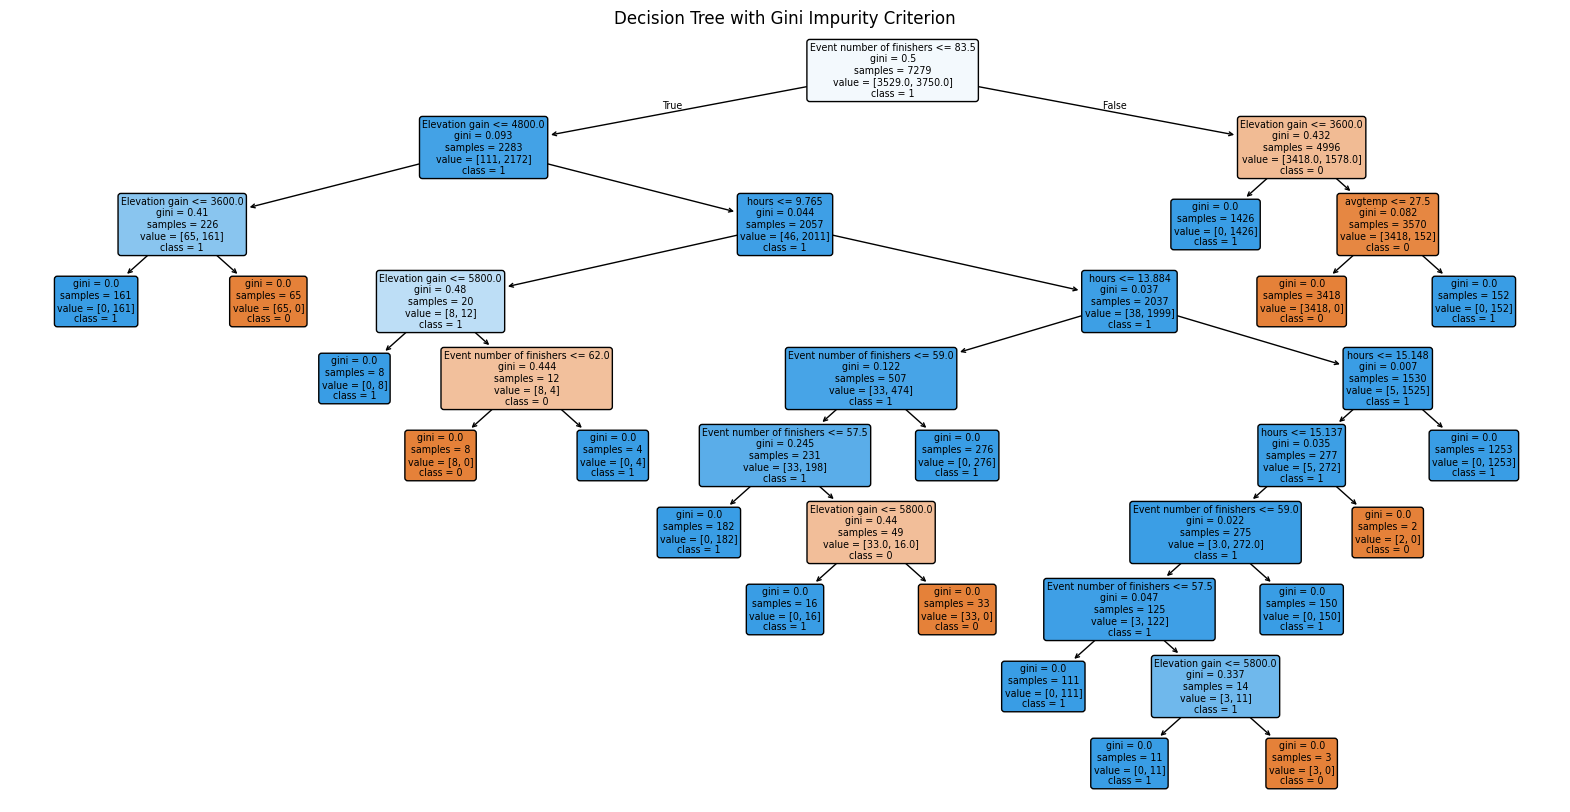

In [158]:
#Gini based Decision Tree with Same Data

# Train decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Decision Tree with Gini Impurity Criterion")
plt.show()

# Visualizing Decision Tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree with Gini Impurity Criterion")
plt.show()

Accuracy: 1.0
              precision    recall  f1-score   support

       71-90       1.00      1.00      1.00       918
      91-120       1.00      1.00      1.00       902

    accuracy                           1.00      1820
   macro avg       1.00      1.00      1.00      1820
weighted avg       1.00      1.00      1.00      1820



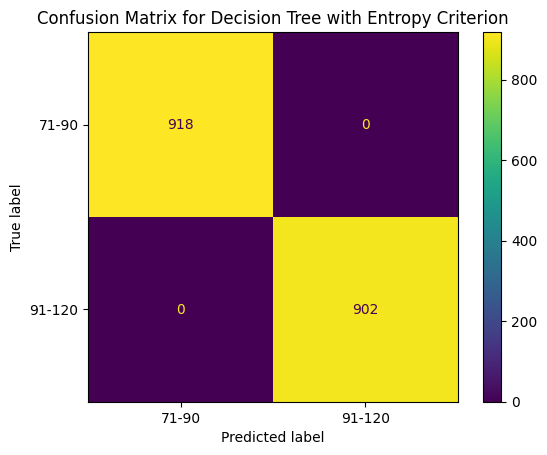

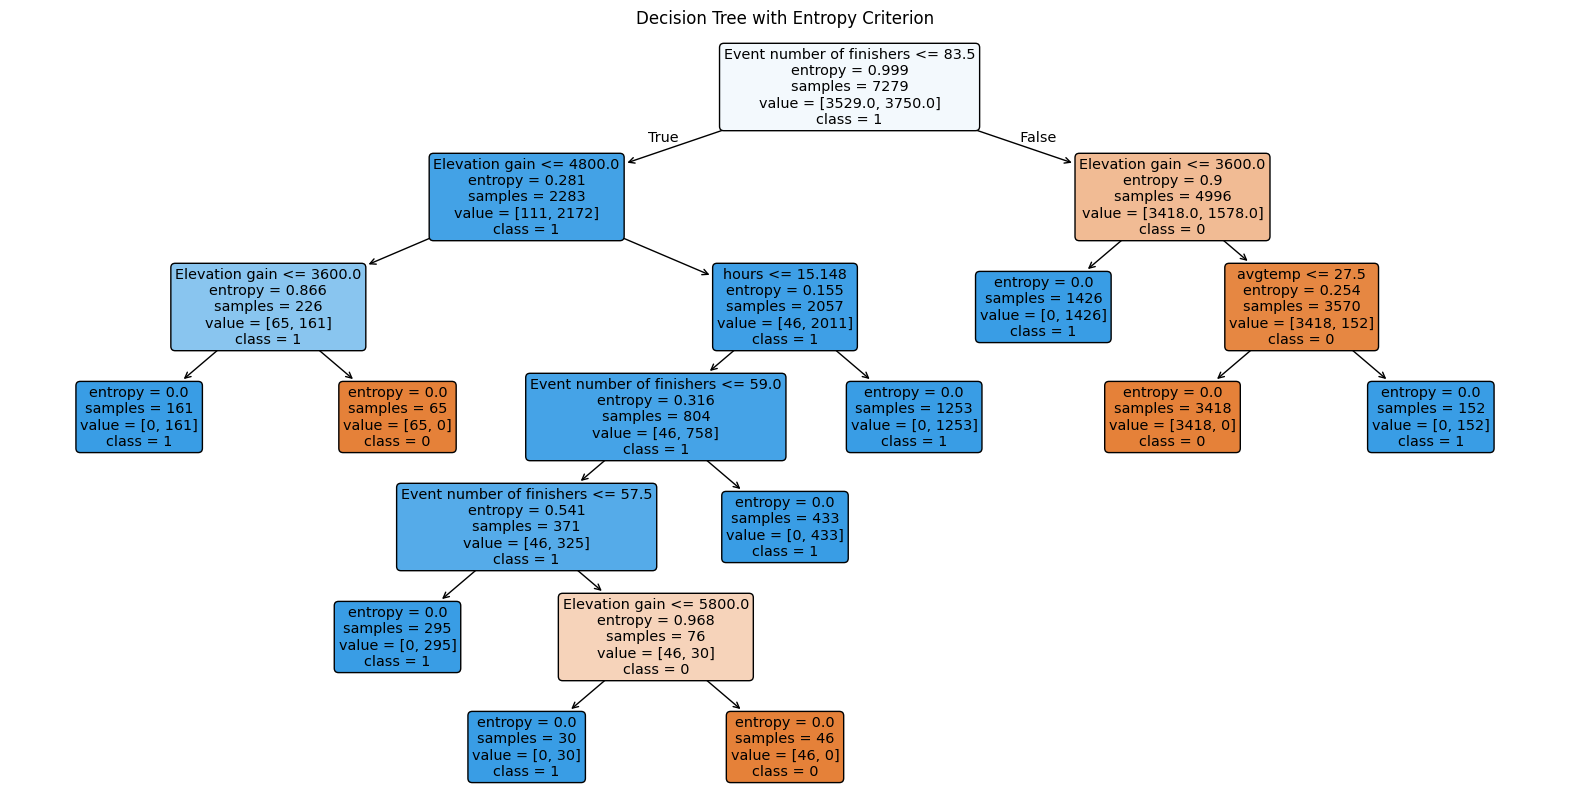

In [157]:
#Entropy based Decision Tree with Same Data


# Train decision tree
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Decision Tree with Entropy Criterion")
plt.show()

# Visualizing Decision Tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree with Entropy Criterion")
plt.show()

Accuracy: 0.9873626373626374
              precision    recall  f1-score   support

       71-90       1.00      0.98      0.99       918
      91-120       0.98      1.00      0.99       902

    accuracy                           0.99      1820
   macro avg       0.99      0.99      0.99      1820
weighted avg       0.99      0.99      0.99      1820



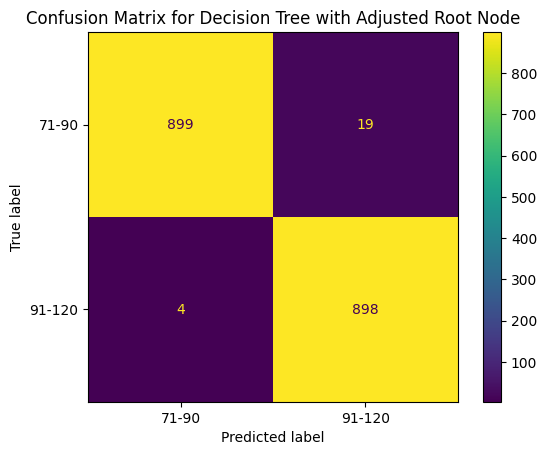

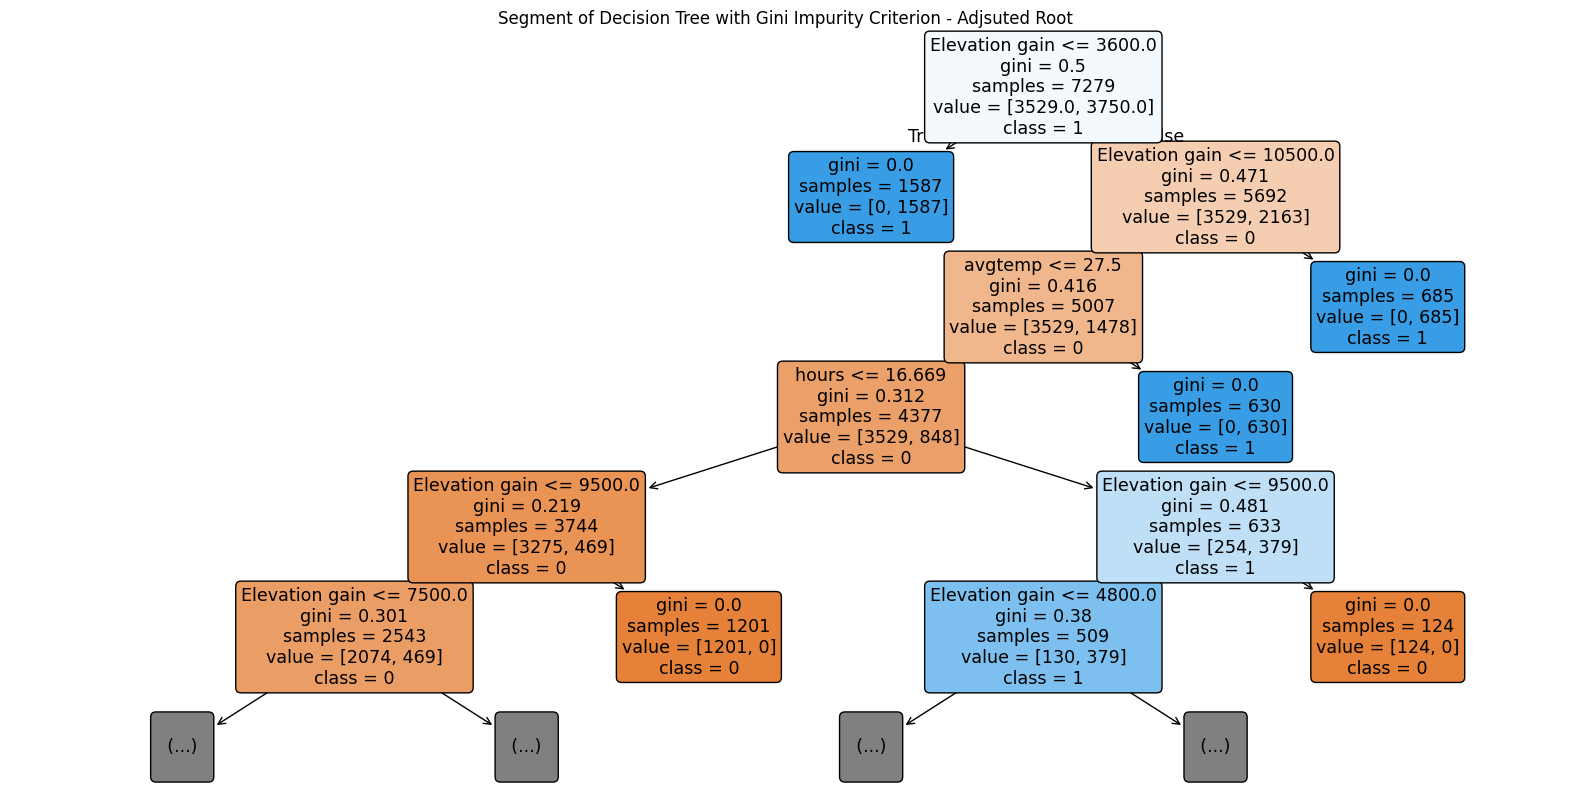

In [205]:
#Adjusting root node Gini Impurity Tree

# Creating new categorized column
bins = [0, 200, 50000]  # Interval edges
labels = [1, 2]  # Category labels
df['number of finishers category'] = pd.cut(df['Event number of finishers'], bins=bins, labels=labels, right=False)

y = df['distance_range']
le = LabelEncoder()
y = le.fit_transform(y)

# X is the rest of the DF
X = df[['number of finishers category', 'age_at_race', 'hours', 'avgtemp', 'Elevation gain']]

#Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 69)
X_train = X_train.astype(float)

# Train decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Decision Tree with Adjusted Root Node")
plt.show()

# Visualizing Decision Tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True,
          max_depth = 5)

plt.title("Segment of Decision Tree with Gini Impurity Criterion - Adjsuted Root")
plt.show()

# Data Prep for Categorical Naive Bayes and categorical Decision Tree

In [162]:
#Prep for categorical NB

#taking categorical data from association rule mining
df = pd.read_csv('FINAL_ASRM.csv')

#adding back column labels
df.columns = [
    'Athlete gender',
    'distance_range',
    'age_cat',
    'hours category',
    'finishing position category',
    'temp category',
    'elevation category'
]

df.drop('finishing position category', axis = 1,  inplace= True)

#just taking specific required labels
df = df[df['distance_range'].isin(['91-120km', '71-90km'])]

df.dropna(inplace= True)

X = df.drop('distance_range', axis=1)  
y = df['distance_range']   

# Encoding features
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42)

## Categorical Naive Bayes

Accuracy: 0.8120879120879121
              precision    recall  f1-score   support

     71-90km       0.76      0.90      0.82       886
    91-120km       0.89      0.73      0.80       934

    accuracy                           0.81      1820
   macro avg       0.82      0.81      0.81      1820
weighted avg       0.82      0.81      0.81      1820



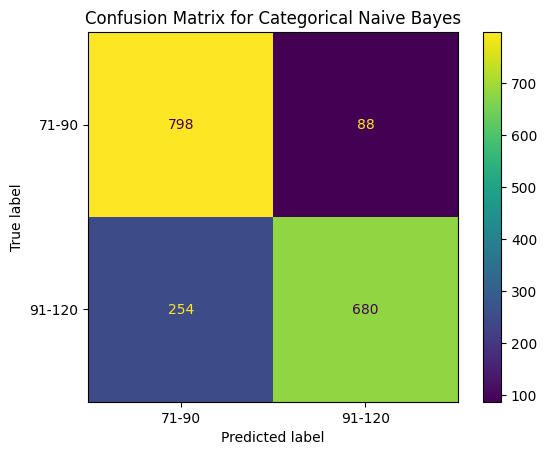

In [163]:
# Train Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Categorical Naive Bayes")
plt.show()

## Categorical Gini Decision Tree

Accuracy: 0.8763736263736264
              precision    recall  f1-score   support

       71-90       0.84      0.92      0.88       886
      91-120       0.91      0.84      0.87       934

    accuracy                           0.88      1820
   macro avg       0.88      0.88      0.88      1820
weighted avg       0.88      0.88      0.88      1820



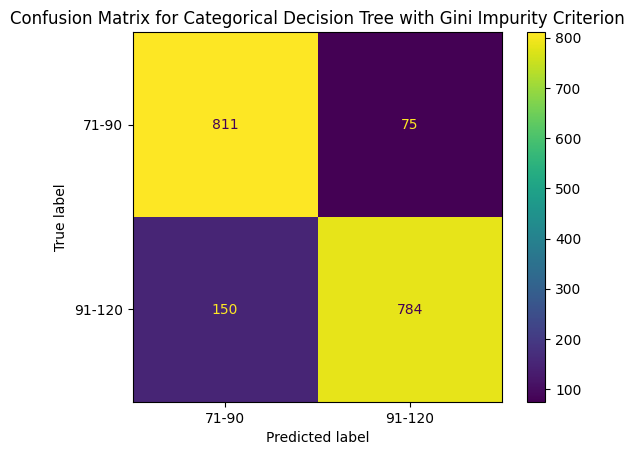

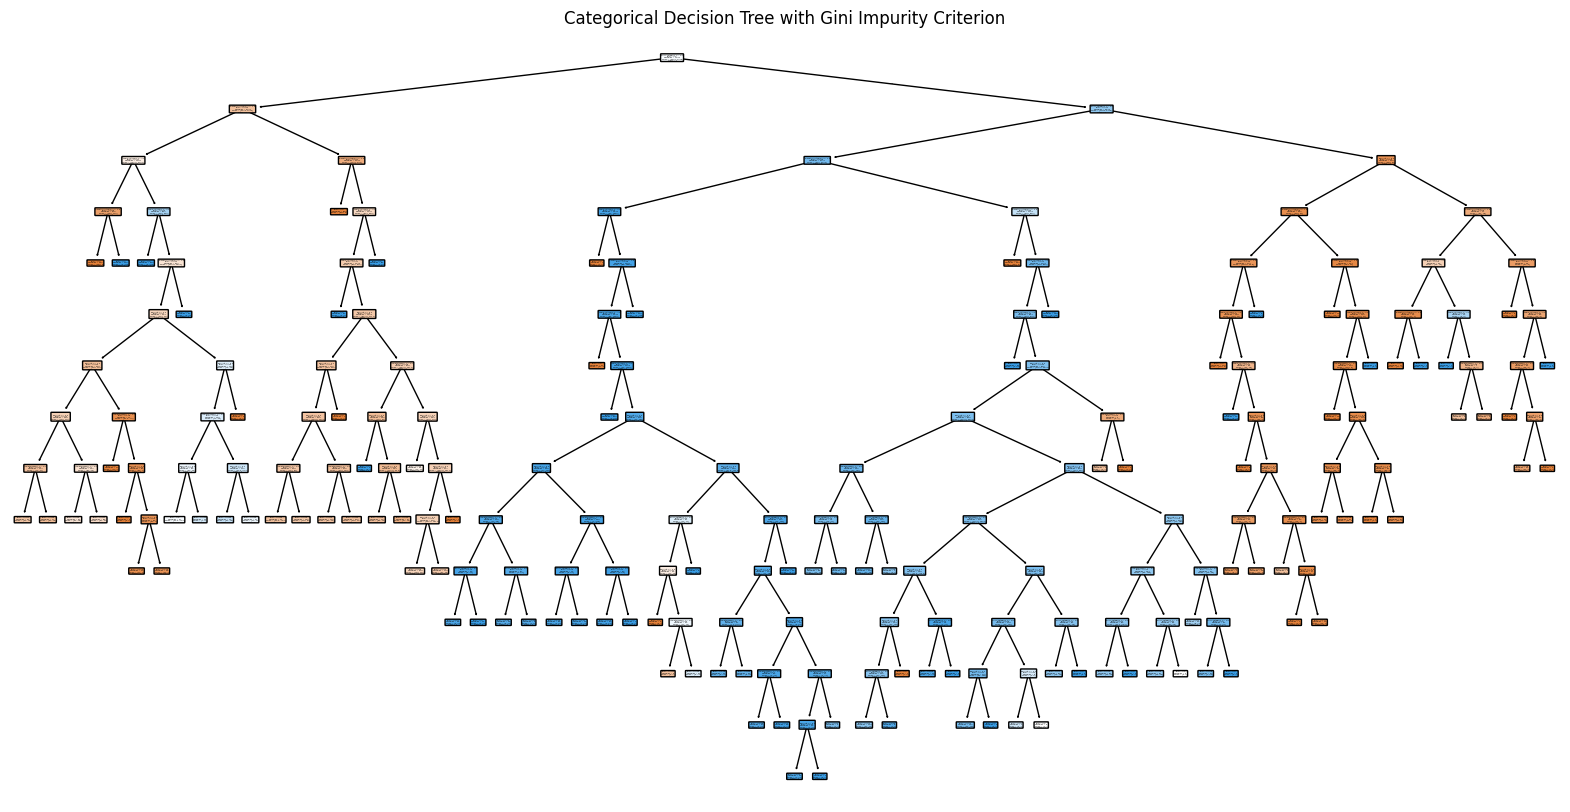

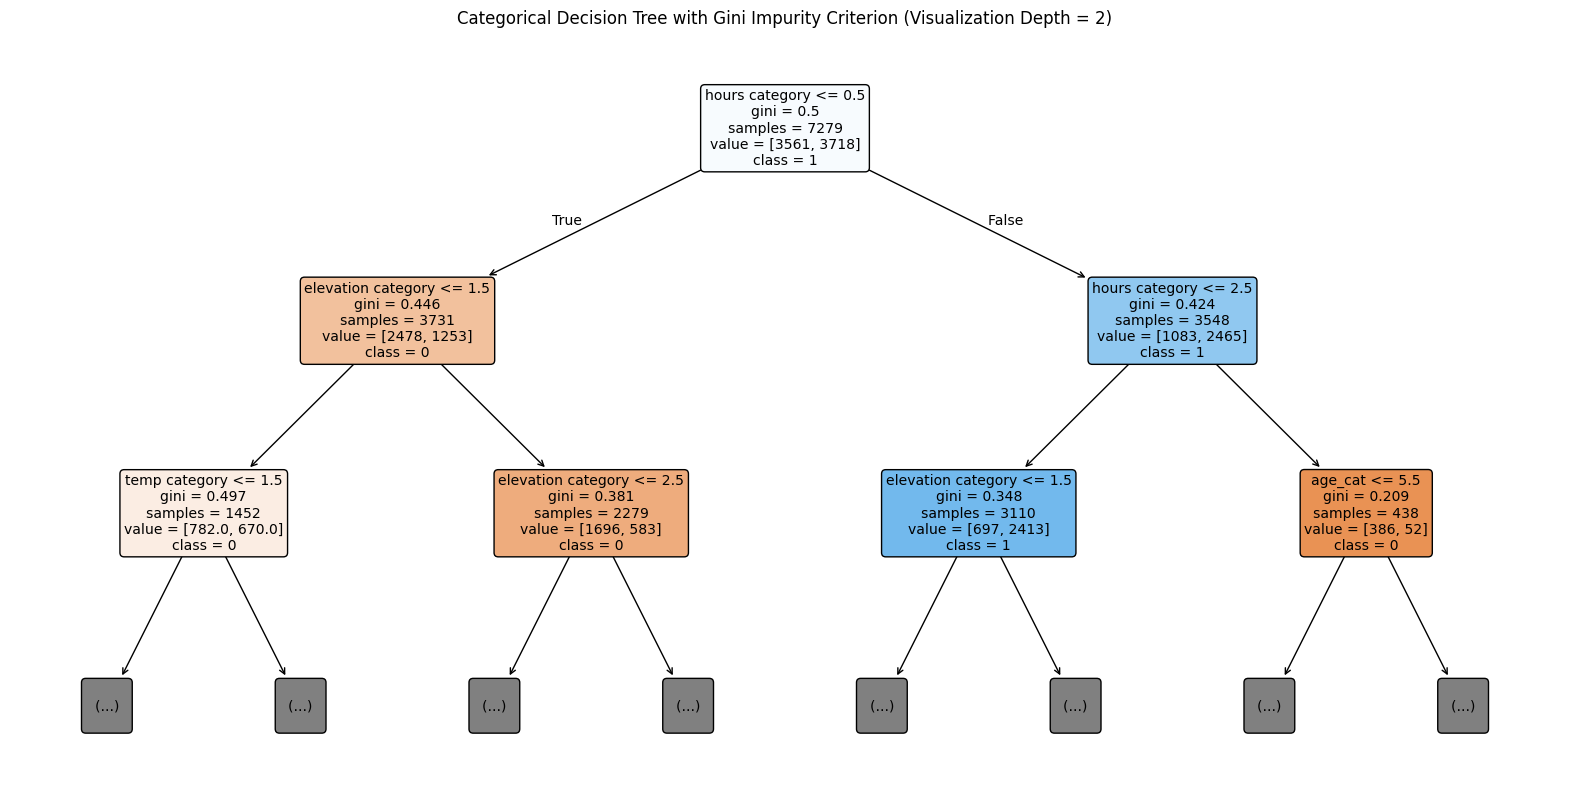

In [170]:
# Train decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicting test set
y_pred = model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Categorical Decision Tree with Gini Impurity Criterion")
plt.show()

# Visualizing Decision Tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True)

plt.title("Categorical Decision Tree with Gini Impurity Criterion")
plt.show()

# Zooming in on Decision Tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, 
          rounded=True,
          max_depth = 2)

plt.title("Categorical Decision Tree with Gini Impurity Criterion (Visualization Depth = 2)")
plt.show()